# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN" APRIL 2023
# Intermediate Level Task



# **Task 2: Prediction using Decision Tree Algorithm :**
#Creating the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# **Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
%matplotlib inline

In [2]:
data = pd.read_csv("/content/Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
print(*data.columns, sep = "\n")

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


# **Displaying the information about the dataset**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# **Checking for the null values**

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [9]:
data = data.drop(['Id'], axis = 1)

# **Describing the data**

In [10]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Plotting the scatter plot**

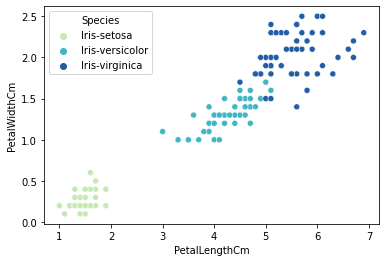

In [11]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=data, palette = 'YlGnBu' )

# **Plotting the pairplot**

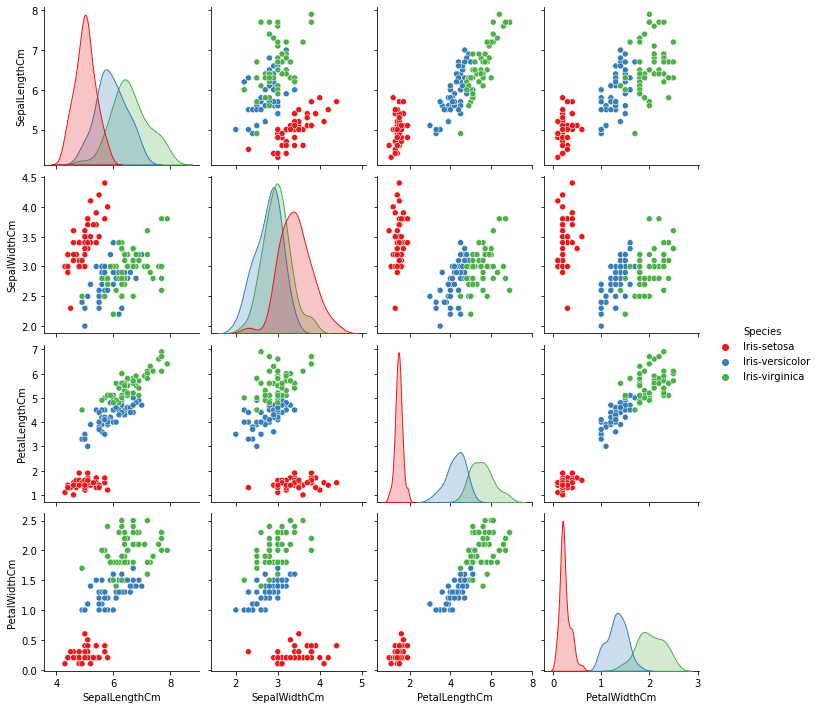

In [12]:
sns.pairplot(data, hue = 'Species', palette = 'Set1')

# **Plotting the boxplots**

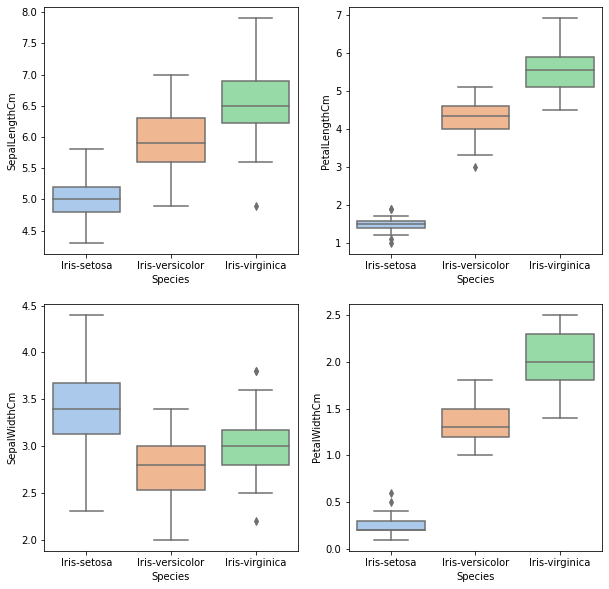

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(y = 'SepalLengthCm', x = 'Species', data = data, palette = 'pastel')

plt.subplot(2,2,2)
# Checking for the outliers
sns.boxplot(y = 'PetalLengthCm', x = 'Species', data = data, palette = 'pastel')

plt.subplot(2,2,3)
sns.boxplot(y = 'SepalWidthCm', x = 'Species', data = data, palette = 'pastel')


plt.subplot(2,2,4)
sns.boxplot(y = 'PetalWidthCm', x = 'Species', data = data, palette = 'pastel')

In [14]:
data = data.sample(frac = 1)

In [15]:
data


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
4,5.0,3.6,1.4,0.2,Iris-setosa
133,6.3,2.8,5.1,1.5,Iris-virginica
90,5.5,2.6,4.4,1.2,Iris-versicolor
40,5.0,3.5,1.3,0.3,Iris-setosa
114,5.8,2.8,5.1,2.4,Iris-virginica
...,...,...,...,...,...
142,5.8,2.7,5.1,1.9,Iris-virginica
59,5.2,2.7,3.9,1.4,Iris-versicolor
19,5.1,3.8,1.5,0.3,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa


# **Label Encoding**

In [16]:
label_encoder = preprocessing.LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

In [17]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
4,5.0,3.6,1.4,0.2,0
133,6.3,2.8,5.1,1.5,2
90,5.5,2.6,4.4,1.2,1
40,5.0,3.5,1.3,0.3,0
114,5.8,2.8,5.1,2.4,2
...,...,...,...,...,...
142,5.8,2.7,5.1,1.9,2
59,5.2,2.7,3.9,1.4,1
19,5.1,3.8,1.5,0.3,0
34,4.9,3.1,1.5,0.1,0


# **Splitting the dataset**

In [18]:
X = data.drop(['Species'], axis = 1)
Y = data.Species

In [19]:
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
4              5.0           3.6            1.4           0.2
133            6.3           2.8            5.1           1.5
90             5.5           2.6            4.4           1.2
40             5.0           3.5            1.3           0.3
114            5.8           2.8            5.1           2.4
..             ...           ...            ...           ...
142            5.8           2.7            5.1           1.9
59             5.2           2.7            3.9           1.4
19             5.1           3.8            1.5           0.3
34             4.9           3.1            1.5           0.1
17             5.1           3.5            1.4           0.3

[150 rows x 4 columns]


In [20]:
print(Y)

4      0
133    2
90     1
40     0
114    2
      ..
142    2
59     1
19     0
34     0
17     0
Name: Species, Length: 150, dtype: int64


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, test_size = 0.25, random_state = 10)

In [23]:
X_train.shape

(112, 4)

In [24]:
X_test.shape

(38, 4)

# **Model Building and Evaluation**

# **Building the Decision Tree Model**

In [25]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
Y_pred = DTC.predict(X_test)

In [26]:
print(accuracy_score(Y_test, Y_pred)*100)

97.36842105263158


In [27]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.97        14

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



# **Plotting the confusion matrix**

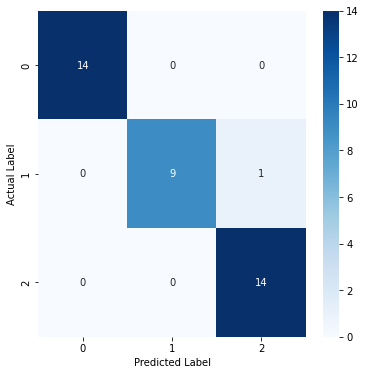

In [28]:
plt.figure(figsize = (6, 6))
CM = confusion_matrix(Y_test, Y_pred)
sns.heatmap(CM,annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [29]:
sample = np.array([[7.3,2.8,6.3, 1.8]]) 
print("The prediction is : ", int(DTC.predict(sample)))

The prediction is :  2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


# **Visualizing the decision tree**

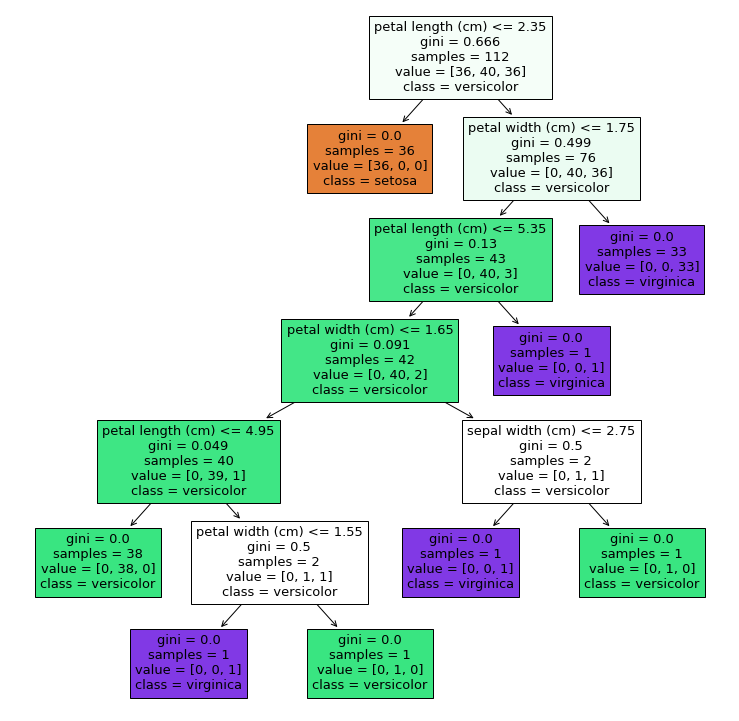

In [30]:
features =['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
species = ['setosa', 'versicolor', 'virginica']
fig = plt.figure(figsize = (13,13))
tree.plot_tree(DTC, feature_names = features, class_names = species, filled = True);

# **Thank You!**